In [1]:
from src.data.datasets import *
import torch
import rdkit.Chem as Chem
import datamol as dm
import os

In [161]:
# function to read in a pdbqt file and return a mol
def read_pdbqt(path) -> Chem.Mol:
    """Read a PDBQT file and return a mol."""

    with open(path, "r") as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines]
    lines = [line for line in lines if line.startswith("ATOM")]
    pdbqt = "\n".join(lines)

    mol = Chem.MolFromPDBBlock(pdbqt)
    return mol


def load_pdbqt_and_add_hs(path) -> Chem.Mol:
    """Load a PDBQT file and add hydrogens."""
    mol = read_pdbqt(path)

    # Save to SDf
    tmp_path = (
        "/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/tmp.sdf"
    )
    dm.to_sdf(mol, tmp_path)

    # Load from SDF
    mol = load_mols_from_sdf(tmp_path)
    os.remove(tmp_path)

    return mol

#### Generated

In [162]:
class DiffSBDDSamples(BasePosesDataset):
    def __init__(
        self,
        data_dir: str = "/Users/charlie/projects/poses_benchmark/data",
        split_path: str = "/Users/charlie/projects/poses_benchmark/data/split_by_name.pt",
    ):
        super().__init__(data_dir=data_dir, split_path=split_path)

        self.ligand_dir = data_dir + "/benchmarks/diffsbdd/"
        # self.data = torch.load(os.path.join(self.ligand_dir, "targetdiff_vina_docked.pt"))

    def prepare_sdf(self, name: str, idx: int = 0):
        """Needs to read ~100 SDFs per target and merge"""

        # Load the first target
        paths = glob.glob(self.ligand_dir + self.names[idx] + "*.pdbqt")

        # Remove 'out' paths to selected generated poses
        paths = [path for path in paths if "out" not in path]
        # Read PDBQTs and remove Nones
        mols = [read_pdbqt(path) for path in paths]
        mols = [mol for mol in mols if mol is not None]

        # Save to tmp sdf and read
        tmp_path = (
            "/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/tmp.sdf"
        )
        dm.to_sdf(mols, tmp_path)
        ligs = load_mols_from_sdf(tmp_path)
        os.remove(tmp_path)

        return ligs


dataset = DiffSBDDSamples()
prot, lig = dataset[0]

#### Docked

In [194]:
class DiffSBDDSamplesDocked(BasePosesDataset):
    def __init__(
        self,
        data_dir: str = "/Users/charlie/projects/poses_benchmark/data",
        split_path: str = "/Users/charlie/projects/poses_benchmark/data/split_by_name.pt",
    ):
        super().__init__(data_dir=data_dir, split_path=split_path)

        self.ligand_dir = data_dir + "/benchmarks/diffsbdd/"
        # self.data = torch.load(os.path.join(self.ligand_dir, "targetdiff_vina_docked.pt"))

    def prepare_sdf(self, name: str, idx: int = 0):
        """Needs to read ~100 SDFs per target and merge"""

        # Load the first target
        paths = glob.glob(self.ligand_dir + self.names[idx] + "*.sdf")

        # Remove 'out' paths to selected generated poses
        paths = [path for path in paths if "out" in path]
        # Read PDBQTs and remove Nones
        mols = [dm.read_sdf(path)[0] for path in paths]
        mols = [mol for mol in mols if mol is not None]

        # Save to tmp sdf and read
        tmp_path = (
            "/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/tmp.sdf"
        )
        dm.to_sdf(mols, tmp_path)
        ligs = load_mols_from_sdf(tmp_path)
        os.remove(tmp_path)

        return ligs

#### Testing

In [189]:
generated = DiffSBDDSamples()
docked = DiffSBDDSamplesDocked()

In [198]:
docked.all_interactions

Calculating interactions...


DiffSBDDSamplesDocked:   0%|          | 0/100 [00:00<?, ?it/s]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2z3h-A-rec-1wn6-bst-lig-tt-docked-3-pocket10_2z3h-A-rec-1wn6-bst-lig-tt-docked-3_gen_25_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2z3h-A-rec-1wn6-bst-lig-tt-docked-3-pocket10_2z3h-A-rec-1wn6-bst-lig-tt-docked-3_gen_35_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2z3h-A-rec-1wn6-bst-lig-tt-docked-3-pocket10_2z3h-A-rec-1wn6-bst-lig-tt-docked-3_gen_47_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2z3h-A-rec-1wn6-bst-lig-tt-docked-3-pocket10_2z3h-A-rec-1wn6-bst-lig-tt-docked-3_gen_57_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2z3h-A-rec-1wn6-bst-lig-tt-docked-3-pocket10_2z3h-A-rec-1wn6-bst-lig-tt-docked-3_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2z3h-A-rec-1wn6-bst-lig-tt-docked-3-pocket10_2z3h-A-rec-1wn6-bst-lig-tt-docked-3_gen_68_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   1%|          | 1/100 [00:07<12:51,  7.79s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw-A-rec-4ac3-r83-lig-tt-min-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw-A-rec-4ac3-r83-lig-tt-min-0_gen_75_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw-A-rec-4ac3-r83-lig-tt-min-0_gen_65_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw-A-rec-4ac3-r83-lig-tt-min-0_gen_17_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw-A-rec-4ac3-r83-lig-tt-min-0_gen_91_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw-A-rec-4ac3-r83-lig-tt-min-0_gen_81_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   2%|▏         | 2/100 [00:15<12:53,  7.89s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4yhj-A-rec-4yhj-an2-lig-tt-min-0-pocket10_4yhj-A-rec-4yhj-an2-lig-tt-min-0_gen_90_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4yhj-A-rec-4yhj-an2-lig-tt-min-0-pocket10_4yhj-A-rec-4yhj-an2-lig-tt-min-0_gen_80_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4yhj-A-rec-4yhj-an2-lig-tt-min-0-pocket10_4yhj-A-rec-4yhj-an2-lig-tt-min-0_gen_29_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4yhj-A-rec-4yhj-an2-lig-tt-min-0-pocket10_4yhj-A-rec-4yhj-an2-lig-tt-min-0_gen_39_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4yhj-A-rec-4yhj-an2-lig-tt-min-0-pocket10_4yhj-A-rec-4yhj-an2-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4yhj-A-rec-4yhj-an2-lig-tt-min-0-pocket10_4yhj-A-rec-4yhj-an2-lig-tt-min-0_gen_16_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   3%|▎         | 3/100 [00:31<18:38, 11.54s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/14gs-A-rec-20gs-cbd-lig-tt-min-0-pocket10_14gs-A-rec-20gs-cbd-lig-tt-min-0_gen_29_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/14gs-A-rec-20gs-cbd-lig-tt-min-0-pocket10_14gs-A-rec-20gs-cbd-lig-tt-min-0_gen_39_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/14gs-A-rec-20gs-cbd-lig-tt-min-0-pocket10_14gs-A-rec-20gs-cbd-lig-tt-min-0_gen_90_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/14gs-A-rec-20gs-cbd-lig-tt-min-0-pocket10_14gs-A-rec-20gs-cbd-lig-tt-min-0_gen_80_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/14gs-A-rec-20gs-cbd-lig-tt-min-0-pocket10_14gs-A-rec-20gs-cbd-lig-tt-min-0_gen_16_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/14gs-A-rec-20gs-cbd-lig-tt-min-0-pocket10_14gs-A-rec-20gs-cbd-lig-tt-min-0_gen_74_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   4%|▍         | 4/100 [00:38<15:12,  9.51s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2v3r-A-rec-1dy4-snp-lig-tt-docked-1-pocket10_2v3r-A-rec-1dy4-snp-lig-tt-docked-1_gen_43_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2v3r-A-rec-1dy4-snp-lig-tt-docked-1-pocket10_2v3r-A-rec-1dy4-snp-lig-tt-docked-1_gen_53_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2v3r-A-rec-1dy4-snp-lig-tt-docked-1-pocket10_2v3r-A-rec-1dy4-snp-lig-tt-docked-1_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2v3r-A-rec-1dy4-snp-lig-tt-docked-1-pocket10_2v3r-A-rec-1dy4-snp-lig-tt-docked-1_gen_21_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2v3r-A-rec-1dy4-snp-lig-tt-docked-1-pocket10_2v3r-A-rec-1dy4-snp-lig-tt-docked-1_gen_31_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2v3r-A-rec-1dy4-snp-lig-tt-docked-1-pocket10_2v3r-A-rec-1dy4-snp-lig-tt-docked-1_gen_98_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   5%|▌         | 5/100 [00:46<14:42,  9.29s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rn0-B-rec-4rn1-l8g-lig-tt-min-0-pocket10_4rn0-B-rec-4rn1-l8g-lig-tt-min-0_gen_2_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rn0-B-rec-4rn1-l8g-lig-tt-min-0-pocket10_4rn0-B-rec-4rn1-l8g-lig-tt-min-0_gen_48_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rn0-B-rec-4rn1-l8g-lig-tt-min-0-pocket10_4rn0-B-rec-4rn1-l8g-lig-tt-min-0_gen_58_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rn0-B-rec-4rn1-l8g-lig-tt-min-0-pocket10_4rn0-B-rec-4rn1-l8g-lig-tt-min-0_gen_93_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rn0-B-rec-4rn1-l8g-lig-tt-min-0-pocket10_4rn0-B-rec-4rn1-l8g-lig-tt-min-0_gen_83_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rn0-B-rec-4rn1-l8g-lig-tt-min-0-pocket10_4rn0-B-rec-4rn1-l8g-lig-tt-min-0_gen_77_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   6%|▌         | 6/100 [00:53<12:53,  8.23s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1fmc-B-rec-1fmc-cho-lig-tt-docked-1-pocket10_1fmc-B-rec-1fmc-cho-lig-tt-docked-1_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1fmc-B-rec-1fmc-cho-lig-tt-docked-1-pocket10_1fmc-B-rec-1fmc-cho-lig-tt-docked-1_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1fmc-B-rec-1fmc-cho-lig-tt-docked-1-pocket10_1fmc-B-rec-1fmc-cho-lig-tt-docked-1_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1fmc-B-rec-1fmc-cho-lig-tt-docked-1-pocket10_1fmc-B-rec-1fmc-cho-lig-tt-docked-1_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1fmc-B-rec-1fmc-cho-lig-tt-docked-1-pocket10_1fmc-B-rec-1fmc-cho-lig-tt-docked-1_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1fmc-B-rec-1fmc-cho-lig-tt-docked-1-pocket10_1fmc-B-rec-1fmc-cho-lig-tt-docked-1_gen_68_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   7%|▋         | 7/100 [01:00<12:25,  8.02s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3daf-A-rec-3daf-feg-lig-tt-docked-0-pocket10_3daf-A-rec-3daf-feg-lig-tt-docked-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3daf-A-rec-3daf-feg-lig-tt-docked-0-pocket10_3daf-A-rec-3daf-feg-lig-tt-docked-0_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3daf-A-rec-3daf-feg-lig-tt-docked-0-pocket10_3daf-A-rec-3daf-feg-lig-tt-docked-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3daf-A-rec-3daf-feg-lig-tt-docked-0-pocket10_3daf-A-rec-3daf-feg-lig-tt-docked-0_gen_54_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3daf-A-rec-3daf-feg-lig-tt-docked-0-pocket10_3daf-A-rec-3daf-feg-lig-tt-docked-0_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3daf-A-rec-3daf-feg-lig-tt-docked-0-pocket10_3daf-A-rec-3daf-feg-lig-tt-docked-0_gen_86_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   8%|▊         | 8/100 [01:17<16:36, 10.84s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1a2g-A-rec-4jmv-1ly-lig-tt-min-0-pocket10_1a2g-A-rec-4jmv-1ly-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1a2g-A-rec-4jmv-1ly-lig-tt-min-0-pocket10_1a2g-A-rec-4jmv-1ly-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1a2g-A-rec-4jmv-1ly-lig-tt-min-0-pocket10_1a2g-A-rec-4jmv-1ly-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1a2g-A-rec-4jmv-1ly-lig-tt-min-0-pocket10_1a2g-A-rec-4jmv-1ly-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1a2g-A-rec-4jmv-1ly-lig-tt-min-0-pocket10_1a2g-A-rec-4jmv-1ly-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1a2g-A-rec-4jmv-1ly-lig-tt-min-0-pocket10_1a2g-A-rec-4jmv-1ly-lig-tt-min-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:   9%|▉         | 9/100 [01:24<14:28,  9.55s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen_59_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen_49_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen_66_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  10%|█         | 10/100 [01:30<13:00,  8.68s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3dzh-A-rec-3u4i-cvr-lig-tt-docked-0-pocket10_3dzh-A-rec-3u4i-cvr-lig-tt-docked-0_gen_0_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3dzh-A-rec-3u4i-cvr-lig-tt-docked-0-pocket10_3dzh-A-rec-3u4i-cvr-lig-tt-docked-0_gen_99_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3dzh-A-rec-3u4i-cvr-lig-tt-docked-0-pocket10_3dzh-A-rec-3u4i-cvr-lig-tt-docked-0_gen_89_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3dzh-A-rec-3u4i-cvr-lig-tt-docked-0-pocket10_3dzh-A-rec-3u4i-cvr-lig-tt-docked-0_gen_20_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3dzh-A-rec-3u4i-cvr-lig-tt-docked-0-pocket10_3dzh-A-rec-3u4i-cvr-lig-tt-docked-0_gen_30_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3dzh-A-rec-3u4i-cvr-lig-tt-docked-0-pocket10_3dzh-A-rec-3u4i-cvr-lig-tt-docked-0_gen_42_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  11%|█         | 11/100 [01:46<15:51, 10.69s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3g51-A-rec-3g51-anp-lig-tt-min-0-pocket10_3g51-A-rec-3g51-anp-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3g51-A-rec-3g51-anp-lig-tt-min-0-pocket10_3g51-A-rec-3g51-anp-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3g51-A-rec-3g51-anp-lig-tt-min-0-pocket10_3g51-A-rec-3g51-anp-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3g51-A-rec-3g51-anp-lig-tt-min-0-pocket10_3g51-A-rec-3g51-anp-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3g51-A-rec-3g51-anp-lig-tt-min-0-pocket10_3g51-A-rec-3g51-anp-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3g51-A-rec-3g51-anp-lig-tt-min-0-pocket10_3g51-A-rec-3g51-anp-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  12%|█▏        | 12/100 [02:01<17:41, 12.06s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1coy-A-rec-1coy-and-lig-tt-docked-0-pocket10_1coy-A-rec-1coy-and-lig-tt-docked-0_gen_89_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1coy-A-rec-1coy-and-lig-tt-docked-0-pocket10_1coy-A-rec-1coy-and-lig-tt-docked-0_gen_99_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1coy-A-rec-1coy-and-lig-tt-docked-0-pocket10_1coy-A-rec-1coy-and-lig-tt-docked-0_gen_30_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1coy-A-rec-1coy-and-lig-tt-docked-0-pocket10_1coy-A-rec-1coy-and-lig-tt-docked-0_gen_20_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1coy-A-rec-1coy-and-lig-tt-docked-0-pocket10_1coy-A-rec-1coy-and-lig-tt-docked-0_gen_52_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1coy-A-rec-1coy-and-lig-tt-docked-0-pocket10_1coy-A-rec-1coy-and-lig-tt-docked-0_gen_42_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  13%|█▎        | 13/100 [02:08<15:09, 10.45s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2jjg-A-rec-2jjg-plp-lig-tt-min-0-pocket10_2jjg-A-rec-2jjg-plp-lig-tt-min-0_gen_54_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2jjg-A-rec-2jjg-plp-lig-tt-min-0-pocket10_2jjg-A-rec-2jjg-plp-lig-tt-min-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2jjg-A-rec-2jjg-plp-lig-tt-min-0-pocket10_2jjg-A-rec-2jjg-plp-lig-tt-min-0_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2jjg-A-rec-2jjg-plp-lig-tt-min-0-pocket10_2jjg-A-rec-2jjg-plp-lig-tt-min-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2jjg-A-rec-2jjg-plp-lig-tt-min-0-pocket10_2jjg-A-rec-2jjg-plp-lig-tt-min-0_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2jjg-A-rec-2jjg-plp-lig-tt-min-0-pocket10_2jjg-A-rec-2jjg-plp-lig-tt-min-0_gen_4_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  14%|█▍        | 14/100 [02:14<13:15,  9.24s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rhy-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2rhy-A-rec-2rhy-mlz-lig-tt-min-0_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rhy-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2rhy-A-rec-2rhy-mlz-lig-tt-min-0_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rhy-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2rhy-A-rec-2rhy-mlz-lig-tt-min-0_gen_49_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rhy-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2rhy-A-rec-2rhy-mlz-lig-tt-min-0_gen_59_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rhy-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2rhy-A-rec-2rhy-mlz-lig-tt-min-0_gen_14_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rhy-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2rhy-A-rec-2rhy-mlz-lig-tt-min-0_gen_76_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  15%|█▌        | 15/100 [02:19<11:13,  7.92s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pqw-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2pqw-A-rec-2rhy-mlz-lig-tt-min-0_gen_69_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pqw-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2pqw-A-rec-2rhy-mlz-lig-tt-min-0_gen_79_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pqw-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2pqw-A-rec-2rhy-mlz-lig-tt-min-0_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pqw-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2pqw-A-rec-2rhy-mlz-lig-tt-min-0_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pqw-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2pqw-A-rec-2rhy-mlz-lig-tt-min-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pqw-A-rec-2rhy-mlz-lig-tt-min-0-pocket10_2pqw-A-rec-2rhy-mlz-lig-tt-min-0_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  16%|█▌        | 16/100 [02:24<10:01,  7.16s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4g3d-B-rec-4idv-13v-lig-tt-min-0-pocket10_4g3d-B-rec-4idv-13v-lig-tt-min-0_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4g3d-B-rec-4idv-13v-lig-tt-min-0-pocket10_4g3d-B-rec-4idv-13v-lig-tt-min-0_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4g3d-B-rec-4idv-13v-lig-tt-min-0-pocket10_4g3d-B-rec-4idv-13v-lig-tt-min-0_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4g3d-B-rec-4idv-13v-lig-tt-min-0-pocket10_4g3d-B-rec-4idv-13v-lig-tt-min-0_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4g3d-B-rec-4idv-13v-lig-tt-min-0-pocket10_4g3d-B-rec-4idv-13v-lig-tt-min-0_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4g3d-B-rec-4idv-13v-lig-tt-min-0-pocket10_4g3d-B-rec-4idv-13v-lig-tt-min-0_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  17%|█▋        | 17/100 [02:40<13:24,  9.70s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5bur-A-rec-5x8f-amp-lig-tt-docked-7-pocket10_5bur-A-rec-5x8f-amp-lig-tt-docked-7_gen_83_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5bur-A-rec-5x8f-amp-lig-tt-docked-7-pocket10_5bur-A-rec-5x8f-amp-lig-tt-docked-7_gen_93_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5bur-A-rec-5x8f-amp-lig-tt-docked-7-pocket10_5bur-A-rec-5x8f-amp-lig-tt-docked-7_gen_58_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5bur-A-rec-5x8f-amp-lig-tt-docked-7-pocket10_5bur-A-rec-5x8f-amp-lig-tt-docked-7_gen_48_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5bur-A-rec-5x8f-amp-lig-tt-docked-7-pocket10_5bur-A-rec-5x8f-amp-lig-tt-docked-7_gen_15_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5bur-A-rec-5x8f-amp-lig-tt-docked-7-pocket10_5bur-A-rec-5x8f-amp-lig-tt-docked-7_gen_67_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  18%|█▊        | 18/100 [02:47<12:00,  8.79s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3gs6-A-rec-2oxn-oan-lig-tt-docked-4-pocket10_3gs6-A-rec-2oxn-oan-lig-tt-docked-4_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3gs6-A-rec-2oxn-oan-lig-tt-docked-4-pocket10_3gs6-A-rec-2oxn-oan-lig-tt-docked-4_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3gs6-A-rec-2oxn-oan-lig-tt-docked-4-pocket10_3gs6-A-rec-2oxn-oan-lig-tt-docked-4_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3gs6-A-rec-2oxn-oan-lig-tt-docked-4-pocket10_3gs6-A-rec-2oxn-oan-lig-tt-docked-4_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3gs6-A-rec-2oxn-oan-lig-tt-docked-4-pocket10_3gs6-A-rec-2oxn-oan-lig-tt-docked-4_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3gs6-A-rec-2oxn-oan-lig-tt-docked-4-pocket10_3gs6-A-rec-2oxn-oan-lig-tt-docked-4_gen_14_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  19%|█▉        | 19/100 [02:53<10:52,  8.06s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen_8_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen_59_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  20%|██        | 20/100 [03:08<13:36, 10.21s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1dxo-C-rec-1gg5-e09-lig-tt-min-0-pocket10_1dxo-C-rec-1gg5-e09-lig-tt-min-0_gen_38_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1dxo-C-rec-1gg5-e09-lig-tt-min-0-pocket10_1dxo-C-rec-1gg5-e09-lig-tt-min-0_gen_28_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1dxo-C-rec-1gg5-e09-lig-tt-min-0-pocket10_1dxo-C-rec-1gg5-e09-lig-tt-min-0_gen_81_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1dxo-C-rec-1gg5-e09-lig-tt-min-0-pocket10_1dxo-C-rec-1gg5-e09-lig-tt-min-0_gen_91_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1dxo-C-rec-1gg5-e09-lig-tt-min-0-pocket10_1dxo-C-rec-1gg5-e09-lig-tt-min-0_gen_65_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1dxo-C-rec-1gg5-e09-lig-tt-min-0-pocket10_1dxo-C-rec-1gg5-e09-lig-tt-min-0_gen_75_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  21%|██        | 21/100 [03:14<11:33,  8.78s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen_84_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen_94_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen_8_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen_12_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen_60_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen_70_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  22%|██▏       | 22/100 [03:20<10:31,  8.10s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5q0k-A-rec-5q0q-9ld-lig-tt-docked-0-pocket10_5q0k-A-rec-5q0q-9ld-lig-tt-docked-0_gen_41_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5q0k-A-rec-5q0q-9ld-lig-tt-docked-0-pocket10_5q0k-A-rec-5q0q-9ld-lig-tt-docked-0_gen_51_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5q0k-A-rec-5q0q-9ld-lig-tt-docked-0-pocket10_5q0k-A-rec-5q0q-9ld-lig-tt-docked-0_gen_23_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5q0k-A-rec-5q0q-9ld-lig-tt-docked-0-pocket10_5q0k-A-rec-5q0q-9ld-lig-tt-docked-0_gen_33_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5q0k-A-rec-5q0q-9ld-lig-tt-docked-0-pocket10_5q0k-A-rec-5q0q-9ld-lig-tt-docked-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5q0k-A-rec-5q0q-9ld-lig-tt-docked-0-pocket10_5q0k-A-rec-5q0q-9ld-lig-tt-docked-0_gen_83_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  23%|██▎       | 23/100 [03:37<13:33, 10.56s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5b08-A-rec-5b09-4mx-lig-tt-min-0-pocket10_5b08-A-rec-5b09-4mx-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5b08-A-rec-5b09-4mx-lig-tt-min-0-pocket10_5b08-A-rec-5b09-4mx-lig-tt-min-0_gen_84_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5b08-A-rec-5b09-4mx-lig-tt-min-0-pocket10_5b08-A-rec-5b09-4mx-lig-tt-min-0_gen_94_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5b08-A-rec-5b09-4mx-lig-tt-min-0-pocket10_5b08-A-rec-5b09-4mx-lig-tt-min-0_gen_12_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5b08-A-rec-5b09-4mx-lig-tt-min-0-pocket10_5b08-A-rec-5b09-4mx-lig-tt-min-0_gen_60_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5b08-A-rec-5b09-4mx-lig-tt-min-0-pocket10_5b08-A-rec-5b09-4mx-lig-tt-min-0_gen_70_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  24%|██▍       | 24/100 [03:43<11:46,  9.30s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2azy-A-rec-2azy-chd-lig-tt-docked-0-pocket10_2azy-A-rec-2azy-chd-lig-tt-docked-0_gen_2_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2azy-A-rec-2azy-chd-lig-tt-docked-0-pocket10_2azy-A-rec-2azy-chd-lig-tt-docked-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2azy-A-rec-2azy-chd-lig-tt-docked-0-pocket10_2azy-A-rec-2azy-chd-lig-tt-docked-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2azy-A-rec-2azy-chd-lig-tt-docked-0-pocket10_2azy-A-rec-2azy-chd-lig-tt-docked-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2azy-A-rec-2azy-chd-lig-tt-docked-0-pocket10_2azy-A-rec-2azy-chd-lig-tt-docked-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2azy-A-rec-2azy-chd-lig-tt-docked-0-pocket10_2azy-A-rec-2azy-chd-lig-tt-docked-0_gen_87_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  25%|██▌       | 25/100 [03:50<10:38,  8.51s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5i0b-A-rec-5vef-m77-lig-tt-min-0-pocket10_5i0b-A-rec-5vef-m77-lig-tt-min-0_gen_27_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5i0b-A-rec-5vef-m77-lig-tt-min-0-pocket10_5i0b-A-rec-5vef-m77-lig-tt-min-0_gen_37_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5i0b-A-rec-5vef-m77-lig-tt-min-0-pocket10_5i0b-A-rec-5vef-m77-lig-tt-min-0_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5i0b-A-rec-5vef-m77-lig-tt-min-0-pocket10_5i0b-A-rec-5vef-m77-lig-tt-min-0_gen_55_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5i0b-A-rec-5vef-m77-lig-tt-min-0-pocket10_5i0b-A-rec-5vef-m77-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5i0b-A-rec-5vef-m77-lig-tt-min-0-pocket10_5i0b-A-rec-5vef-m77-lig-tt-min-0_gen_18_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  26%|██▌       | 26/100 [03:56<09:42,  7.87s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1phk-A-rec-1phk-atp-lig-tt-min-0-pocket10_1phk-A-rec-1phk-atp-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1phk-A-rec-1phk-atp-lig-tt-min-0-pocket10_1phk-A-rec-1phk-atp-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1phk-A-rec-1phk-atp-lig-tt-min-0-pocket10_1phk-A-rec-1phk-atp-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1phk-A-rec-1phk-atp-lig-tt-min-0-pocket10_1phk-A-rec-1phk-atp-lig-tt-min-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1phk-A-rec-1phk-atp-lig-tt-min-0-pocket10_1phk-A-rec-1phk-atp-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1phk-A-rec-1phk-atp-lig-tt-min-0-pocket10_1phk-A-rec-1phk-atp-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  27%|██▋       | 27/100 [04:12<12:28, 10.25s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4keu-A-rec-4ket-pg4-lig-tt-min-0-pocket10_4keu-A-rec-4ket-pg4-lig-tt-min-0_gen_52_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4keu-A-rec-4ket-pg4-lig-tt-min-0-pocket10_4keu-A-rec-4ket-pg4-lig-tt-min-0_gen_42_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4keu-A-rec-4ket-pg4-lig-tt-min-0-pocket10_4keu-A-rec-4ket-pg4-lig-tt-min-0_gen_89_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4keu-A-rec-4ket-pg4-lig-tt-min-0-pocket10_4keu-A-rec-4ket-pg4-lig-tt-min-0_gen_99_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4keu-A-rec-4ket-pg4-lig-tt-min-0-pocket10_4keu-A-rec-4ket-pg4-lig-tt-min-0_gen_30_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4keu-A-rec-4ket-pg4-lig-tt-min-0-pocket10_4keu-A-rec-4ket-pg4-lig-tt-min-0_gen_20_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  28%|██▊       | 28/100 [04:19<11:10,  9.31s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4q8b-B-rec-4q8b-sxx-lig-tt-min-0-pocket10_4q8b-B-rec-4q8b-sxx-lig-tt-min-0_gen_6_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4q8b-B-rec-4q8b-sxx-lig-tt-min-0-pocket10_4q8b-B-rec-4q8b-sxx-lig-tt-min-0_gen_18_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4q8b-B-rec-4q8b-sxx-lig-tt-min-0-pocket10_4q8b-B-rec-4q8b-sxx-lig-tt-min-0_gen_37_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4q8b-B-rec-4q8b-sxx-lig-tt-min-0-pocket10_4q8b-B-rec-4q8b-sxx-lig-tt-min-0_gen_27_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4q8b-B-rec-4q8b-sxx-lig-tt-min-0-pocket10_4q8b-B-rec-4q8b-sxx-lig-tt-min-0_gen_55_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4q8b-B-rec-4q8b-sxx-lig-tt-min-0-pocket10_4q8b-B-rec-4q8b-sxx-lig-tt-min-0_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  29%|██▉       | 29/100 [04:24<09:39,  8.16s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1djy-A-rec-1djz-ip2-lig-tt-min-0-pocket10_1djy-A-rec-1djz-ip2-lig-tt-min-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1djy-A-rec-1djz-ip2-lig-tt-min-0-pocket10_1djy-A-rec-1djz-ip2-lig-tt-min-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1djy-A-rec-1djz-ip2-lig-tt-min-0-pocket10_1djy-A-rec-1djz-ip2-lig-tt-min-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1djy-A-rec-1djz-ip2-lig-tt-min-0-pocket10_1djy-A-rec-1djz-ip2-lig-tt-min-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1djy-A-rec-1djz-ip2-lig-tt-min-0-pocket10_1djy-A-rec-1djz-ip2-lig-tt-min-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1djy-A-rec-1djz-ip2-lig-tt-min-0-pocket10_1djy-A-rec-1djz-ip2-lig-tt-min-0_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  30%|███       | 30/100 [04:31<08:53,  7.63s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5l1v-A-rec-5l1v-7pf-lig-tt-docked-0-pocket10_5l1v-A-rec-5l1v-7pf-lig-tt-docked-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5l1v-A-rec-5l1v-7pf-lig-tt-docked-0-pocket10_5l1v-A-rec-5l1v-7pf-lig-tt-docked-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5l1v-A-rec-5l1v-7pf-lig-tt-docked-0-pocket10_5l1v-A-rec-5l1v-7pf-lig-tt-docked-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5l1v-A-rec-5l1v-7pf-lig-tt-docked-0-pocket10_5l1v-A-rec-5l1v-7pf-lig-tt-docked-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5l1v-A-rec-5l1v-7pf-lig-tt-docked-0-pocket10_5l1v-A-rec-5l1v-7pf-lig-tt-docked-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5l1v-A-rec-5l1v-7pf-lig-tt-docked-0-pocket10_5l1v-A-rec-5l1v-7pf-lig-tt-docked-0_gen_37_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  31%|███       | 31/100 [04:37<08:23,  7.30s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4zfa-A-rec-1smj-pam-lig-tt-min-0-pocket10_4zfa-A-rec-1smj-pam-lig-tt-min-0_gen_94_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4zfa-A-rec-1smj-pam-lig-tt-min-0-pocket10_4zfa-A-rec-1smj-pam-lig-tt-min-0_gen_84_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4zfa-A-rec-1smj-pam-lig-tt-min-0-pocket10_4zfa-A-rec-1smj-pam-lig-tt-min-0_gen_12_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4zfa-A-rec-1smj-pam-lig-tt-min-0-pocket10_4zfa-A-rec-1smj-pam-lig-tt-min-0_gen_70_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4zfa-A-rec-1smj-pam-lig-tt-min-0-pocket10_4zfa-A-rec-1smj-pam-lig-tt-min-0_gen_60_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4zfa-A-rec-1smj-pam-lig-tt-min-0-pocket10_4zfa-A-rec-1smj-pam-lig-tt-min-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  32%|███▏      | 32/100 [04:53<11:17,  9.96s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rma-A-rec-3rdd-ea4-lig-tt-docked-0-pocket10_2rma-A-rec-3rdd-ea4-lig-tt-docked-0_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rma-A-rec-3rdd-ea4-lig-tt-docked-0-pocket10_2rma-A-rec-3rdd-ea4-lig-tt-docked-0_gen_96_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rma-A-rec-3rdd-ea4-lig-tt-docked-0-pocket10_2rma-A-rec-3rdd-ea4-lig-tt-docked-0_gen_10_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rma-A-rec-3rdd-ea4-lig-tt-docked-0-pocket10_2rma-A-rec-3rdd-ea4-lig-tt-docked-0_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rma-A-rec-3rdd-ea4-lig-tt-docked-0-pocket10_2rma-A-rec-3rdd-ea4-lig-tt-docked-0_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2rma-A-rec-3rdd-ea4-lig-tt-docked-0-pocket10_2rma-A-rec-3rdd-ea4-lig-tt-docked-0_gen_44_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  33%|███▎      | 33/100 [05:00<10:05,  9.04s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3b6h-A-rec-3b6h-mxd-lig-tt-min-0-pocket10_3b6h-A-rec-3b6h-mxd-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3b6h-A-rec-3b6h-mxd-lig-tt-min-0-pocket10_3b6h-A-rec-3b6h-mxd-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3b6h-A-rec-3b6h-mxd-lig-tt-min-0-pocket10_3b6h-A-rec-3b6h-mxd-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3b6h-A-rec-3b6h-mxd-lig-tt-min-0-pocket10_3b6h-A-rec-3b6h-mxd-lig-tt-min-0_gen_1_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3b6h-A-rec-3b6h-mxd-lig-tt-min-0-pocket10_3b6h-A-rec-3b6h-mxd-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3b6h-A-rec-3b6h-mxd-lig-tt-min-0-pocket10_3b6h-A-rec-3b6h-mxd-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  34%|███▍      | 34/100 [05:07<09:04,  8.26s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2zen-A-rec-2afx-1bn-lig-tt-docked-7-pocket10_2zen-A-rec-2afx-1bn-lig-tt-docked-7_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2zen-A-rec-2afx-1bn-lig-tt-docked-7-pocket10_2zen-A-rec-2afx-1bn-lig-tt-docked-7_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2zen-A-rec-2afx-1bn-lig-tt-docked-7-pocket10_2zen-A-rec-2afx-1bn-lig-tt-docked-7_gen_59_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2zen-A-rec-2afx-1bn-lig-tt-docked-7-pocket10_2zen-A-rec-2afx-1bn-lig-tt-docked-7_gen_49_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2zen-A-rec-2afx-1bn-lig-tt-docked-7-pocket10_2zen-A-rec-2afx-1bn-lig-tt-docked-7_gen_14_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2zen-A-rec-2afx-1bn-lig-tt-docked-7-pocket10_2zen-A-rec-2afx-1bn-lig-tt-docked-7_gen_66_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  35%|███▌      | 35/100 [05:13<08:14,  7.61s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4p6p-A-rec-4p77-5rp-lig-tt-docked-0-pocket10_4p6p-A-rec-4p77-5rp-lig-tt-docked-0_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4p6p-A-rec-4p77-5rp-lig-tt-docked-0-pocket10_4p6p-A-rec-4p77-5rp-lig-tt-docked-0_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4p6p-A-rec-4p77-5rp-lig-tt-docked-0-pocket10_4p6p-A-rec-4p77-5rp-lig-tt-docked-0_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4p6p-A-rec-4p77-5rp-lig-tt-docked-0-pocket10_4p6p-A-rec-4p77-5rp-lig-tt-docked-0_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4p6p-A-rec-4p77-5rp-lig-tt-docked-0-pocket10_4p6p-A-rec-4p77-5rp-lig-tt-docked-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4p6p-A-rec-4p77-5rp-lig-tt-docked-0-pocket10_4p6p-A-rec-4p77-5rp-lig-tt-docked-0_gen_92_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  36%|███▌      | 36/100 [05:19<07:41,  7.21s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen_0_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  37%|███▋      | 37/100 [05:26<07:37,  7.26s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4f1m-A-rec-4f1m-acp-lig-tt-min-0-pocket10_4f1m-A-rec-4f1m-acp-lig-tt-min-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4f1m-A-rec-4f1m-acp-lig-tt-min-0-pocket10_4f1m-A-rec-4f1m-acp-lig-tt-min-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4f1m-A-rec-4f1m-acp-lig-tt-min-0-pocket10_4f1m-A-rec-4f1m-acp-lig-tt-min-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4f1m-A-rec-4f1m-acp-lig-tt-min-0-pocket10_4f1m-A-rec-4f1m-acp-lig-tt-min-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4f1m-A-rec-4f1m-acp-lig-tt-min-0-pocket10_4f1m-A-rec-4f1m-acp-lig-tt-min-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4f1m-A-rec-4f1m-acp-lig-tt-min-0-pocket10_4f1m-A-rec-4f1m-acp-lig-tt-min-0_gen_2_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  38%|███▊      | 38/100 [05:33<07:16,  7.03s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tqr-A-rec-2xca-doc-lig-tt-min-0-pocket10_4tqr-A-rec-2xca-doc-lig-tt-min-0_gen_7_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tqr-A-rec-2xca-doc-lig-tt-min-0-pocket10_4tqr-A-rec-2xca-doc-lig-tt-min-0_gen_43_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tqr-A-rec-2xca-doc-lig-tt-min-0-pocket10_4tqr-A-rec-2xca-doc-lig-tt-min-0_gen_53_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tqr-A-rec-2xca-doc-lig-tt-min-0-pocket10_4tqr-A-rec-2xca-doc-lig-tt-min-0_gen_21_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tqr-A-rec-2xca-doc-lig-tt-min-0-pocket10_4tqr-A-rec-2xca-doc-lig-tt-min-0_gen_31_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tqr-A-rec-2xca-doc-lig-tt-min-0-pocket10_4tqr-A-rec-2xca-doc-lig-tt-min-0_gen_98_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  39%|███▉      | 39/100 [05:38<06:34,  6.46s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4lfu-A-rec-4y13-480-lig-tt-min-0-pocket10_4lfu-A-rec-4y13-480-lig-tt-min-0_gen_69_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4lfu-A-rec-4y13-480-lig-tt-min-0-pocket10_4lfu-A-rec-4y13-480-lig-tt-min-0_gen_79_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4lfu-A-rec-4y13-480-lig-tt-min-0-pocket10_4lfu-A-rec-4y13-480-lig-tt-min-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4lfu-A-rec-4y13-480-lig-tt-min-0-pocket10_4lfu-A-rec-4y13-480-lig-tt-min-0_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4lfu-A-rec-4y13-480-lig-tt-min-0-pocket10_4lfu-A-rec-4y13-480-lig-tt-min-0_gen_8_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4lfu-A-rec-4y13-480-lig-tt-min-0-pocket10_4lfu-A-rec-4y13-480-lig-tt-min-0_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  40%|████      | 40/100 [05:46<06:47,  6.79s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen_7_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen_55_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen_37_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen_27_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen_18_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  41%|████      | 41/100 [05:52<06:40,  6.80s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iwq-A-rec-4jlc-su6-lig-tt-min-0-pocket10_4iwq-A-rec-4jlc-su6-lig-tt-min-0_gen_9_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iwq-A-rec-4jlc-su6-lig-tt-min-0-pocket10_4iwq-A-rec-4jlc-su6-lig-tt-min-0_gen_28_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iwq-A-rec-4jlc-su6-lig-tt-min-0-pocket10_4iwq-A-rec-4jlc-su6-lig-tt-min-0_gen_38_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iwq-A-rec-4jlc-su6-lig-tt-min-0-pocket10_4iwq-A-rec-4jlc-su6-lig-tt-min-0_gen_91_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iwq-A-rec-4jlc-su6-lig-tt-min-0-pocket10_4iwq-A-rec-4jlc-su6-lig-tt-min-0_gen_81_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iwq-A-rec-4jlc-su6-lig-tt-min-0-pocket10_4iwq-A-rec-4jlc-su6-lig-tt-min-0_gen_75_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  42%|████▏     | 42/100 [05:59<06:26,  6.67s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1l3l-A-rec-1l3l-lae-lig-tt-min-0-pocket10_1l3l-A-rec-1l3l-lae-lig-tt-min-0_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1l3l-A-rec-1l3l-lae-lig-tt-min-0-pocket10_1l3l-A-rec-1l3l-lae-lig-tt-min-0_gen_54_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1l3l-A-rec-1l3l-lae-lig-tt-min-0-pocket10_1l3l-A-rec-1l3l-lae-lig-tt-min-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1l3l-A-rec-1l3l-lae-lig-tt-min-0-pocket10_1l3l-A-rec-1l3l-lae-lig-tt-min-0_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1l3l-A-rec-1l3l-lae-lig-tt-min-0-pocket10_1l3l-A-rec-1l3l-lae-lig-tt-min-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1l3l-A-rec-1l3l-lae-lig-tt-min-0-pocket10_1l3l-A-rec-1l3l-lae-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  44%|████▍     | 44/100 [06:15<06:13,  6.67s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5ngz-A-rec-5ngz-2bg-lig-tt-min-0-pocket10_5ngz-A-rec-5ngz-2bg-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5ngz-A-rec-5ngz-2bg-lig-tt-min-0-pocket10_5ngz-A-rec-5ngz-2bg-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5ngz-A-rec-5ngz-2bg-lig-tt-min-0-pocket10_5ngz-A-rec-5ngz-2bg-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5ngz-A-rec-5ngz-2bg-lig-tt-min-0-pocket10_5ngz-A-rec-5ngz-2bg-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5ngz-A-rec-5ngz-2bg-lig-tt-min-0-pocket10_5ngz-A-rec-5ngz-2bg-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5ngz-A-rec-5ngz-2bg-lig-tt-min-0-pocket10_5ngz-A-rec-5ngz-2bg-lig-tt-min-0_gen_57_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  45%|████▌     | 45/100 [06:31<08:39,  9.44s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e24-A-rec-1j0n-ceg-lig-tt-docked-14-pocket10_2e24-A-rec-1j0n-ceg-lig-tt-docked-14_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e24-A-rec-1j0n-ceg-lig-tt-docked-14-pocket10_2e24-A-rec-1j0n-ceg-lig-tt-docked-14_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e24-A-rec-1j0n-ceg-lig-tt-docked-14-pocket10_2e24-A-rec-1j0n-ceg-lig-tt-docked-14_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e24-A-rec-1j0n-ceg-lig-tt-docked-14-pocket10_2e24-A-rec-1j0n-ceg-lig-tt-docked-14_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e24-A-rec-1j0n-ceg-lig-tt-docked-14-pocket10_2e24-A-rec-1j0n-ceg-lig-tt-docked-14_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e24-A-rec-1j0n-ceg-lig-tt-docked-14-pocket10_2e24-A-rec-1j0n-ceg-lig-tt-docked-14_gen_25_out.sdf', '/U

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  46%|████▌     | 46/100 [06:37<07:35,  8.43s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2hcj-B-rec-2hcj-gdp-lig-tt-docked-0-pocket10_2hcj-B-rec-2hcj-gdp-lig-tt-docked-0_gen_65_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2hcj-B-rec-2hcj-gdp-lig-tt-docked-0-pocket10_2hcj-B-rec-2hcj-gdp-lig-tt-docked-0_gen_75_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2hcj-B-rec-2hcj-gdp-lig-tt-docked-0-pocket10_2hcj-B-rec-2hcj-gdp-lig-tt-docked-0_gen_17_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2hcj-B-rec-2hcj-gdp-lig-tt-docked-0-pocket10_2hcj-B-rec-2hcj-gdp-lig-tt-docked-0_gen_38_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2hcj-B-rec-2hcj-gdp-lig-tt-docked-0-pocket10_2hcj-B-rec-2hcj-gdp-lig-tt-docked-0_gen_28_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2hcj-B-rec-2hcj-gdp-lig-tt-docked-0-pocket10_2hcj-B-rec-2hcj-gdp-lig-tt-docked-0_gen_81_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  47%|████▋     | 47/100 [06:43<06:47,  7.69s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3kc1-A-rec-3kc1-2t6-lig-tt-min-0-pocket10_3kc1-A-rec-3kc1-2t6-lig-tt-min-0_gen_6_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3kc1-A-rec-3kc1-2t6-lig-tt-min-0-pocket10_3kc1-A-rec-3kc1-2t6-lig-tt-min-0_gen_43_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3kc1-A-rec-3kc1-2t6-lig-tt-min-0-pocket10_3kc1-A-rec-3kc1-2t6-lig-tt-min-0_gen_53_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3kc1-A-rec-3kc1-2t6-lig-tt-min-0-pocket10_3kc1-A-rec-3kc1-2t6-lig-tt-min-0_gen_21_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3kc1-A-rec-3kc1-2t6-lig-tt-min-0-pocket10_3kc1-A-rec-3kc1-2t6-lig-tt-min-0_gen_31_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3kc1-A-rec-3kc1-2t6-lig-tt-min-0-pocket10_3kc1-A-rec-3kc1-2t6-lig-tt-min-0_gen_98_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  48%|████▊     | 48/100 [06:49<06:17,  7.26s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen_4_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen_79_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  49%|████▉     | 49/100 [06:55<05:51,  6.89s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4ja8-B-rec-4ja8-1k9-lig-tt-docked-0-pocket10_4ja8-B-rec-4ja8-1k9-lig-tt-docked-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4ja8-B-rec-4ja8-1k9-lig-tt-docked-0-pocket10_4ja8-B-rec-4ja8-1k9-lig-tt-docked-0_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4ja8-B-rec-4ja8-1k9-lig-tt-docked-0-pocket10_4ja8-B-rec-4ja8-1k9-lig-tt-docked-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4ja8-B-rec-4ja8-1k9-lig-tt-docked-0-pocket10_4ja8-B-rec-4ja8-1k9-lig-tt-docked-0_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4ja8-B-rec-4ja8-1k9-lig-tt-docked-0-pocket10_4ja8-B-rec-4ja8-1k9-lig-tt-docked-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4ja8-B-rec-4ja8-1k9-lig-tt-docked-0-pocket10_4ja8-B-rec-4ja8-1k9-lig-tt-docked-0_gen_54_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  50%|█████     | 50/100 [07:12<08:15,  9.91s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4u5s-A-rec-4u54-3c5-lig-tt-min-0-pocket10_4u5s-A-rec-4u54-3c5-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4u5s-A-rec-4u54-3c5-lig-tt-min-0-pocket10_4u5s-A-rec-4u54-3c5-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4u5s-A-rec-4u54-3c5-lig-tt-min-0-pocket10_4u5s-A-rec-4u54-3c5-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4u5s-A-rec-4u54-3c5-lig-tt-min-0-pocket10_4u5s-A-rec-4u54-3c5-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4u5s-A-rec-4u54-3c5-lig-tt-min-0-pocket10_4u5s-A-rec-4u54-3c5-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4u5s-A-rec-4u54-3c5-lig-tt-min-0-pocket10_4u5s-A-rec-4u54-3c5-lig-tt-min-0_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  51%|█████     | 51/100 [07:18<07:07,  8.73s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iiy-A-rec-3tle-gsu-lig-tt-docked-12-pocket10_4iiy-A-rec-3tle-gsu-lig-tt-docked-12_gen_10_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iiy-A-rec-3tle-gsu-lig-tt-docked-12-pocket10_4iiy-A-rec-3tle-gsu-lig-tt-docked-12_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iiy-A-rec-3tle-gsu-lig-tt-docked-12-pocket10_4iiy-A-rec-3tle-gsu-lig-tt-docked-12_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iiy-A-rec-3tle-gsu-lig-tt-docked-12-pocket10_4iiy-A-rec-3tle-gsu-lig-tt-docked-12_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iiy-A-rec-3tle-gsu-lig-tt-docked-12-pocket10_4iiy-A-rec-3tle-gsu-lig-tt-docked-12_gen_96_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4iiy-A-rec-3tle-gsu-lig-tt-docked-12-pocket10_4iiy-A-rec-3tle-gsu-lig-tt-docked-12_gen_19_out.sdf', '/U

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  52%|█████▏    | 52/100 [07:26<06:50,  8.56s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3v4t-A-rec-4e7f-udp-lig-tt-min-0-pocket10_3v4t-A-rec-4e7f-udp-lig-tt-min-0_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3v4t-A-rec-4e7f-udp-lig-tt-min-0-pocket10_3v4t-A-rec-4e7f-udp-lig-tt-min-0_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3v4t-A-rec-4e7f-udp-lig-tt-min-0-pocket10_3v4t-A-rec-4e7f-udp-lig-tt-min-0_gen_1_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3v4t-A-rec-4e7f-udp-lig-tt-min-0-pocket10_3v4t-A-rec-4e7f-udp-lig-tt-min-0_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3v4t-A-rec-4e7f-udp-lig-tt-min-0-pocket10_3v4t-A-rec-4e7f-udp-lig-tt-min-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3v4t-A-rec-4e7f-udp-lig-tt-min-0-pocket10_3v4t-A-rec-4e7f-udp-lig-tt-min-0_gen_79_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  53%|█████▎    | 53/100 [07:33<06:14,  7.96s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen_47_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen_57_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen_25_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen_35_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen_68_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  54%|█████▍    | 54/100 [07:39<05:44,  7.50s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4d7o-A-rec-3n5z-xfm-lig-tt-min-0-pocket10_4d7o-A-rec-3n5z-xfm-lig-tt-min-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4d7o-A-rec-3n5z-xfm-lig-tt-min-0-pocket10_4d7o-A-rec-3n5z-xfm-lig-tt-min-0_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4d7o-A-rec-3n5z-xfm-lig-tt-min-0-pocket10_4d7o-A-rec-3n5z-xfm-lig-tt-min-0_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4d7o-A-rec-3n5z-xfm-lig-tt-min-0-pocket10_4d7o-A-rec-3n5z-xfm-lig-tt-min-0_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4d7o-A-rec-3n5z-xfm-lig-tt-min-0-pocket10_4d7o-A-rec-3n5z-xfm-lig-tt-min-0_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4d7o-A-rec-3n5z-xfm-lig-tt-min-0-pocket10_4d7o-A-rec-3n5z-xfm-lig-tt-min-0_gen_66_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  55%|█████▌    | 55/100 [07:46<05:21,  7.14s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen_94_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen_84_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen_2_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen_12_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen_70_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen_60_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  56%|█████▌    | 56/100 [07:51<04:54,  6.70s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1rs9-A-rec-1dmk-itu-lig-tt-min-0-pocket10_1rs9-A-rec-1dmk-itu-lig-tt-min-0_gen_33_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1rs9-A-rec-1dmk-itu-lig-tt-min-0-pocket10_1rs9-A-rec-1dmk-itu-lig-tt-min-0_gen_23_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1rs9-A-rec-1dmk-itu-lig-tt-min-0-pocket10_1rs9-A-rec-1dmk-itu-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1rs9-A-rec-1dmk-itu-lig-tt-min-0-pocket10_1rs9-A-rec-1dmk-itu-lig-tt-min-0_gen_51_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1rs9-A-rec-1dmk-itu-lig-tt-min-0-pocket10_1rs9-A-rec-1dmk-itu-lig-tt-min-0_gen_41_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1rs9-A-rec-1dmk-itu-lig-tt-min-0-pocket10_1rs9-A-rec-1dmk-itu-lig-tt-min-0_gen_48_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  57%|█████▋    | 57/100 [07:57<04:32,  6.34s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4kcq-A-rec-4cwv-hw8-lig-tt-min-0-pocket10_4kcq-A-rec-4cwv-hw8-lig-tt-min-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4kcq-A-rec-4cwv-hw8-lig-tt-min-0-pocket10_4kcq-A-rec-4cwv-hw8-lig-tt-min-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4kcq-A-rec-4cwv-hw8-lig-tt-min-0-pocket10_4kcq-A-rec-4cwv-hw8-lig-tt-min-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4kcq-A-rec-4cwv-hw8-lig-tt-min-0-pocket10_4kcq-A-rec-4cwv-hw8-lig-tt-min-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4kcq-A-rec-4cwv-hw8-lig-tt-min-0-pocket10_4kcq-A-rec-4cwv-hw8-lig-tt-min-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4kcq-A-rec-4cwv-hw8-lig-tt-min-0-pocket10_4kcq-A-rec-4cwv-hw8-lig-tt-min-0_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  58%|█████▊    | 58/100 [08:03<04:25,  6.31s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pdh-A-rec-4buz-ocz-lig-tt-min-0-pocket10_3pdh-A-rec-4buz-ocz-lig-tt-min-0_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pdh-A-rec-4buz-ocz-lig-tt-min-0-pocket10_3pdh-A-rec-4buz-ocz-lig-tt-min-0_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pdh-A-rec-4buz-ocz-lig-tt-min-0-pocket10_3pdh-A-rec-4buz-ocz-lig-tt-min-0_gen_1_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pdh-A-rec-4buz-ocz-lig-tt-min-0-pocket10_3pdh-A-rec-4buz-ocz-lig-tt-min-0_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pdh-A-rec-4buz-ocz-lig-tt-min-0-pocket10_3pdh-A-rec-4buz-ocz-lig-tt-min-0_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pdh-A-rec-4buz-ocz-lig-tt-min-0-pocket10_3pdh-A-rec-4buz-ocz-lig-tt-min-0_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  59%|█████▉    | 59/100 [08:09<04:16,  6.26s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1umd-B-rec-1umb-tdp-lig-tt-docked-1_gen_89_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1umd-B-rec-1umb-tdp-lig-tt-docked-1_gen_99_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1umd-B-rec-1umb-tdp-lig-tt-docked-1_gen_30_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1umd-B-rec-1umb-tdp-lig-tt-docked-1_gen_20_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1umd-B-rec-1umb-tdp-lig-tt-docked-1_gen_52_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1umd-B-rec-1umb-tdp-lig-tt-docked-1_gen_42_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  60%|██████    | 60/100 [08:24<05:54,  8.86s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4pxz-A-rec-4pxz-6ad-lig-tt-min-0-pocket10_4pxz-A-rec-4pxz-6ad-lig-tt-min-0_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4pxz-A-rec-4pxz-6ad-lig-tt-min-0-pocket10_4pxz-A-rec-4pxz-6ad-lig-tt-min-0_gen_68_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4pxz-A-rec-4pxz-6ad-lig-tt-min-0-pocket10_4pxz-A-rec-4pxz-6ad-lig-tt-min-0_gen_4_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4pxz-A-rec-4pxz-6ad-lig-tt-min-0-pocket10_4pxz-A-rec-4pxz-6ad-lig-tt-min-0_gen_47_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4pxz-A-rec-4pxz-6ad-lig-tt-min-0-pocket10_4pxz-A-rec-4pxz-6ad-lig-tt-min-0_gen_57_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4pxz-A-rec-4pxz-6ad-lig-tt-min-0-pocket10_4pxz-A-rec-4pxz-6ad-lig-tt-min-0_gen_25_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  61%|██████    | 61/100 [08:40<07:08, 11.00s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2gns-A-rec-4qer-stl-lig-tt-min-0-pocket10_2gns-A-rec-4qer-stl-lig-tt-min-0_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2gns-A-rec-4qer-stl-lig-tt-min-0-pocket10_2gns-A-rec-4qer-stl-lig-tt-min-0_gen_96_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2gns-A-rec-4qer-stl-lig-tt-min-0-pocket10_2gns-A-rec-4qer-stl-lig-tt-min-0_gen_10_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2gns-A-rec-4qer-stl-lig-tt-min-0-pocket10_2gns-A-rec-4qer-stl-lig-tt-min-0_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2gns-A-rec-4qer-stl-lig-tt-min-0-pocket10_2gns-A-rec-4qer-stl-lig-tt-min-0_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2gns-A-rec-4qer-stl-lig-tt-min-0-pocket10_2gns-A-rec-4qer-stl-lig-tt-min-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  62%|██████▏   | 62/100 [08:45<05:45,  9.09s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen_38_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen_28_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen_81_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen_91_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen_17_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen_65_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  63%|██████▎   | 63/100 [08:51<05:03,  8.21s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mma-A-rec-4ztf-x2p-lig-tt-min-0-pocket10_5mma-A-rec-4ztf-x2p-lig-tt-min-0_gen_22_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mma-A-rec-4ztf-x2p-lig-tt-min-0-pocket10_5mma-A-rec-4ztf-x2p-lig-tt-min-0_gen_32_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mma-A-rec-4ztf-x2p-lig-tt-min-0-pocket10_5mma-A-rec-4ztf-x2p-lig-tt-min-0_gen_6_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mma-A-rec-4ztf-x2p-lig-tt-min-0-pocket10_5mma-A-rec-4ztf-x2p-lig-tt-min-0_gen_40_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mma-A-rec-4ztf-x2p-lig-tt-min-0-pocket10_5mma-A-rec-4ztf-x2p-lig-tt-min-0_gen_50_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mma-A-rec-4ztf-x2p-lig-tt-min-0-pocket10_5mma-A-rec-4ztf-x2p-lig-tt-min-0_gen_59_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  64%|██████▍   | 64/100 [08:56<04:23,  7.31s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen_54_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen_9_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  65%|██████▌   | 65/100 [09:02<04:04,  7.00s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3w83-B-rec-2e6d-fum-lig-tt-min-0-pocket10_3w83-B-rec-2e6d-fum-lig-tt-min-0_gen_21_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3w83-B-rec-2e6d-fum-lig-tt-min-0-pocket10_3w83-B-rec-2e6d-fum-lig-tt-min-0_gen_31_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3w83-B-rec-2e6d-fum-lig-tt-min-0-pocket10_3w83-B-rec-2e6d-fum-lig-tt-min-0_gen_98_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3w83-B-rec-2e6d-fum-lig-tt-min-0-pocket10_3w83-B-rec-2e6d-fum-lig-tt-min-0_gen_88_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3w83-B-rec-2e6d-fum-lig-tt-min-0-pocket10_3w83-B-rec-2e6d-fum-lig-tt-min-0_gen_4_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3w83-B-rec-2e6d-fum-lig-tt-min-0-pocket10_3w83-B-rec-2e6d-fum-lig-tt-min-0_gen_43_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  66%|██████▌   | 66/100 [09:09<03:52,  6.83s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e6d-A-rec-2e6d-fum-lig-tt-min-0-pocket10_2e6d-A-rec-2e6d-fum-lig-tt-min-0_gen_9_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e6d-A-rec-2e6d-fum-lig-tt-min-0-pocket10_2e6d-A-rec-2e6d-fum-lig-tt-min-0_gen_47_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e6d-A-rec-2e6d-fum-lig-tt-min-0-pocket10_2e6d-A-rec-2e6d-fum-lig-tt-min-0_gen_57_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e6d-A-rec-2e6d-fum-lig-tt-min-0-pocket10_2e6d-A-rec-2e6d-fum-lig-tt-min-0_gen_25_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e6d-A-rec-2e6d-fum-lig-tt-min-0-pocket10_2e6d-A-rec-2e6d-fum-lig-tt-min-0_gen_35_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2e6d-A-rec-2e6d-fum-lig-tt-min-0-pocket10_2e6d-A-rec-2e6d-fum-lig-tt-min-0_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  67%|██████▋   | 67/100 [09:15<03:37,  6.58s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rv4-A-rec-4rv4-prp-lig-tt-docked-2-pocket10_4rv4-A-rec-4rv4-prp-lig-tt-docked-2_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rv4-A-rec-4rv4-prp-lig-tt-docked-2-pocket10_4rv4-A-rec-4rv4-prp-lig-tt-docked-2_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rv4-A-rec-4rv4-prp-lig-tt-docked-2-pocket10_4rv4-A-rec-4rv4-prp-lig-tt-docked-2_gen_10_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rv4-A-rec-4rv4-prp-lig-tt-docked-2-pocket10_4rv4-A-rec-4rv4-prp-lig-tt-docked-2_gen_1_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rv4-A-rec-4rv4-prp-lig-tt-docked-2-pocket10_4rv4-A-rec-4rv4-prp-lig-tt-docked-2_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rv4-A-rec-4rv4-prp-lig-tt-docked-2-pocket10_4rv4-A-rec-4rv4-prp-lig-tt-docked-2_gen_96_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  68%|██████▊   | 68/100 [09:21<03:23,  6.36s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5d7n-D-rec-4jt9-1ns-lig-tt-min-0-pocket10_5d7n-D-rec-4jt9-1ns-lig-tt-min-0_gen_14_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5d7n-D-rec-4jt9-1ns-lig-tt-min-0-pocket10_5d7n-D-rec-4jt9-1ns-lig-tt-min-0_gen_76_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5d7n-D-rec-4jt9-1ns-lig-tt-min-0-pocket10_5d7n-D-rec-4jt9-1ns-lig-tt-min-0_gen_66_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5d7n-D-rec-4jt9-1ns-lig-tt-min-0-pocket10_5d7n-D-rec-4jt9-1ns-lig-tt-min-0_gen_1_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5d7n-D-rec-4jt9-1ns-lig-tt-min-0-pocket10_5d7n-D-rec-4jt9-1ns-lig-tt-min-0_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5d7n-D-rec-4jt9-1ns-lig-tt-min-0-pocket10_5d7n-D-rec-4jt9-1ns-lig-tt-min-0_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  69%|██████▉   | 69/100 [09:27<03:18,  6.40s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mgl-A-rec-5mgl-7mu-lig-tt-min-0-pocket10_5mgl-A-rec-5mgl-7mu-lig-tt-min-0_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mgl-A-rec-5mgl-7mu-lig-tt-min-0-pocket10_5mgl-A-rec-5mgl-7mu-lig-tt-min-0_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mgl-A-rec-5mgl-7mu-lig-tt-min-0-pocket10_5mgl-A-rec-5mgl-7mu-lig-tt-min-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mgl-A-rec-5mgl-7mu-lig-tt-min-0-pocket10_5mgl-A-rec-5mgl-7mu-lig-tt-min-0_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mgl-A-rec-5mgl-7mu-lig-tt-min-0-pocket10_5mgl-A-rec-5mgl-7mu-lig-tt-min-0_gen_69_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5mgl-A-rec-5mgl-7mu-lig-tt-min-0-pocket10_5mgl-A-rec-5mgl-7mu-lig-tt-min-0_gen_79_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  70%|███████   | 70/100 [09:33<03:05,  6.18s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h36-A-rec-1o79-r23-lig-tt-docked-5-pocket10_1h36-A-rec-1o79-r23-lig-tt-docked-5_gen_27_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h36-A-rec-1o79-r23-lig-tt-docked-5-pocket10_1h36-A-rec-1o79-r23-lig-tt-docked-5_gen_37_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h36-A-rec-1o79-r23-lig-tt-docked-5-pocket10_1h36-A-rec-1o79-r23-lig-tt-docked-5_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h36-A-rec-1o79-r23-lig-tt-docked-5-pocket10_1h36-A-rec-1o79-r23-lig-tt-docked-5_gen_55_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h36-A-rec-1o79-r23-lig-tt-docked-5-pocket10_1h36-A-rec-1o79-r23-lig-tt-docked-5_gen_7_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h36-A-rec-1o79-r23-lig-tt-docked-5-pocket10_1h36-A-rec-1o79-r23-lig-tt-docked-5_gen_18_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  71%|███████   | 71/100 [09:49<04:28,  9.24s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4gvd-A-rec-4nxr-ans-lig-tt-min-0-pocket10_4gvd-A-rec-4nxr-ans-lig-tt-min-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4gvd-A-rec-4nxr-ans-lig-tt-min-0-pocket10_4gvd-A-rec-4nxr-ans-lig-tt-min-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4gvd-A-rec-4nxr-ans-lig-tt-min-0-pocket10_4gvd-A-rec-4nxr-ans-lig-tt-min-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4gvd-A-rec-4nxr-ans-lig-tt-min-0-pocket10_4gvd-A-rec-4nxr-ans-lig-tt-min-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4gvd-A-rec-4nxr-ans-lig-tt-min-0-pocket10_4gvd-A-rec-4nxr-ans-lig-tt-min-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4gvd-A-rec-4nxr-ans-lig-tt-min-0-pocket10_4gvd-A-rec-4nxr-ans-lig-tt-min-0_gen_55_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  72%|███████▏  | 72/100 [09:54<03:41,  7.93s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen_43_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen_53_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen_98_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen_88_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen_21_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen_31_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  73%|███████▎  | 73/100 [10:10<04:37, 10.28s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5aeh-A-rec-5aeh-8ir-lig-tt-docked-0-pocket10_5aeh-A-rec-5aeh-8ir-lig-tt-docked-0_gen_68_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5aeh-A-rec-5aeh-8ir-lig-tt-docked-0-pocket10_5aeh-A-rec-5aeh-8ir-lig-tt-docked-0_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5aeh-A-rec-5aeh-8ir-lig-tt-docked-0-pocket10_5aeh-A-rec-5aeh-8ir-lig-tt-docked-0_gen_57_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5aeh-A-rec-5aeh-8ir-lig-tt-docked-0-pocket10_5aeh-A-rec-5aeh-8ir-lig-tt-docked-0_gen_47_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5aeh-A-rec-5aeh-8ir-lig-tt-docked-0-pocket10_5aeh-A-rec-5aeh-8ir-lig-tt-docked-0_gen_35_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5aeh-A-rec-5aeh-8ir-lig-tt-docked-0-pocket10_5aeh-A-rec-5aeh-8ir-lig-tt-docked-0_gen_25_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  74%|███████▍  | 74/100 [10:16<03:59,  9.19s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen_79_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen_69_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen_34_out.sdf', '/Users/charlie

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  75%|███████▌  | 75/100 [10:23<03:29,  8.38s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rlu-A-rec-4rlu-hcc-lig-tt-min-0-pocket10_4rlu-A-rec-4rlu-hcc-lig-tt-min-0_gen_93_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rlu-A-rec-4rlu-hcc-lig-tt-min-0-pocket10_4rlu-A-rec-4rlu-hcc-lig-tt-min-0_gen_83_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rlu-A-rec-4rlu-hcc-lig-tt-min-0-pocket10_4rlu-A-rec-4rlu-hcc-lig-tt-min-0_gen_6_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rlu-A-rec-4rlu-hcc-lig-tt-min-0-pocket10_4rlu-A-rec-4rlu-hcc-lig-tt-min-0_gen_48_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rlu-A-rec-4rlu-hcc-lig-tt-min-0-pocket10_4rlu-A-rec-4rlu-hcc-lig-tt-min-0_gen_58_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4rlu-A-rec-4rlu-hcc-lig-tt-min-0-pocket10_4rlu-A-rec-4rlu-hcc-lig-tt-min-0_gen_15_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  76%|███████▌  | 76/100 [10:30<03:12,  8.02s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4xli-B-rec-4xli-1n1-lig-tt-min-0-pocket10_4xli-B-rec-4xli-1n1-lig-tt-min-0_gen_16_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4xli-B-rec-4xli-1n1-lig-tt-min-0-pocket10_4xli-B-rec-4xli-1n1-lig-tt-min-0_gen_74_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4xli-B-rec-4xli-1n1-lig-tt-min-0-pocket10_4xli-B-rec-4xli-1n1-lig-tt-min-0_gen_64_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4xli-B-rec-4xli-1n1-lig-tt-min-0-pocket10_4xli-B-rec-4xli-1n1-lig-tt-min-0_gen_90_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4xli-B-rec-4xli-1n1-lig-tt-min-0-pocket10_4xli-B-rec-4xli-1n1-lig-tt-min-0_gen_80_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4xli-B-rec-4xli-1n1-lig-tt-min-0-pocket10_4xli-B-rec-4xli-1n1-lig-tt-min-0_gen_2_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  77%|███████▋  | 77/100 [10:37<02:59,  7.82s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3l3n-A-rec-2iux-nxa-lig-tt-docked-2-pocket10_3l3n-A-rec-2iux-nxa-lig-tt-docked-2_gen_8_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3l3n-A-rec-2iux-nxa-lig-tt-docked-2-pocket10_3l3n-A-rec-2iux-nxa-lig-tt-docked-2_gen_30_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3l3n-A-rec-2iux-nxa-lig-tt-docked-2-pocket10_3l3n-A-rec-2iux-nxa-lig-tt-docked-2_gen_20_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3l3n-A-rec-2iux-nxa-lig-tt-docked-2-pocket10_3l3n-A-rec-2iux-nxa-lig-tt-docked-2_gen_89_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3l3n-A-rec-2iux-nxa-lig-tt-docked-2-pocket10_3l3n-A-rec-2iux-nxa-lig-tt-docked-2_gen_99_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3l3n-A-rec-2iux-nxa-lig-tt-docked-2-pocket10_3l3n-A-rec-2iux-nxa-lig-tt-docked-2_gen_52_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  78%|███████▊  | 78/100 [10:44<02:42,  7.37s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5tjn-A-rec-1zj1-nlc-lig-tt-docked-4-pocket10_5tjn-A-rec-1zj1-nlc-lig-tt-docked-4_gen_12_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5tjn-A-rec-1zj1-nlc-lig-tt-docked-4-pocket10_5tjn-A-rec-1zj1-nlc-lig-tt-docked-4_gen_70_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5tjn-A-rec-1zj1-nlc-lig-tt-docked-4-pocket10_5tjn-A-rec-1zj1-nlc-lig-tt-docked-4_gen_60_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5tjn-A-rec-1zj1-nlc-lig-tt-docked-4-pocket10_5tjn-A-rec-1zj1-nlc-lig-tt-docked-4_gen_94_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5tjn-A-rec-1zj1-nlc-lig-tt-docked-4-pocket10_5tjn-A-rec-1zj1-nlc-lig-tt-docked-4_gen_84_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5tjn-A-rec-1zj1-nlc-lig-tt-docked-4-pocket10_5tjn-A-rec-1zj1-nlc-lig-tt-docked-4_gen_5_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  79%|███████▉  | 79/100 [10:49<02:21,  6.73s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5liu-X-rec-4gq0-qap-lig-tt-min-0-pocket10_5liu-X-rec-4gq0-qap-lig-tt-min-0_gen_55_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5liu-X-rec-4gq0-qap-lig-tt-min-0-pocket10_5liu-X-rec-4gq0-qap-lig-tt-min-0_gen_45_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5liu-X-rec-4gq0-qap-lig-tt-min-0-pocket10_5liu-X-rec-4gq0-qap-lig-tt-min-0_gen_37_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5liu-X-rec-4gq0-qap-lig-tt-min-0-pocket10_5liu-X-rec-4gq0-qap-lig-tt-min-0_gen_27_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5liu-X-rec-4gq0-qap-lig-tt-min-0-pocket10_5liu-X-rec-4gq0-qap-lig-tt-min-0_gen_0_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/5liu-X-rec-4gq0-qap-lig-tt-min-0-pocket10_5liu-X-rec-4gq0-qap-lig-tt-min-0_gen_18_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  80%|████████  | 80/100 [10:56<02:14,  6.74s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3o96-A-rec-3o96-iqo-lig-tt-docked-2-pocket10_3o96-A-rec-3o96-iqo-lig-tt-docked-2_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3o96-A-rec-3o96-iqo-lig-tt-docked-2-pocket10_3o96-A-rec-3o96-iqo-lig-tt-docked-2_gen_96_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3o96-A-rec-3o96-iqo-lig-tt-docked-2-pocket10_3o96-A-rec-3o96-iqo-lig-tt-docked-2_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3o96-A-rec-3o96-iqo-lig-tt-docked-2-pocket10_3o96-A-rec-3o96-iqo-lig-tt-docked-2_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3o96-A-rec-3o96-iqo-lig-tt-docked-2-pocket10_3o96-A-rec-3o96-iqo-lig-tt-docked-2_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3o96-A-rec-3o96-iqo-lig-tt-docked-2-pocket10_3o96-A-rec-3o96-iqo-lig-tt-docked-2_gen_10_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  81%|████████  | 81/100 [11:12<03:02,  9.59s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4qlk-A-rec-4qlk-ctt-lig-tt-docked-0-pocket10_4qlk-A-rec-4qlk-ctt-lig-tt-docked-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4qlk-A-rec-4qlk-ctt-lig-tt-docked-0-pocket10_4qlk-A-rec-4qlk-ctt-lig-tt-docked-0_gen_12_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4qlk-A-rec-4qlk-ctt-lig-tt-docked-0-pocket10_4qlk-A-rec-4qlk-ctt-lig-tt-docked-0_gen_70_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4qlk-A-rec-4qlk-ctt-lig-tt-docked-0-pocket10_4qlk-A-rec-4qlk-ctt-lig-tt-docked-0_gen_60_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4qlk-A-rec-4qlk-ctt-lig-tt-docked-0-pocket10_4qlk-A-rec-4qlk-ctt-lig-tt-docked-0_gen_94_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4qlk-A-rec-4qlk-ctt-lig-tt-docked-0-pocket10_4qlk-A-rec-4qlk-ctt-lig-tt-docked-0_gen_84_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  82%|████████▏ | 82/100 [11:28<03:26, 11.47s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3hy9-B-rec-3hyg-099-lig-tt-min-0-pocket10_3hy9-B-rec-3hyg-099-lig-tt-min-0_gen_29_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3hy9-B-rec-3hyg-099-lig-tt-min-0-pocket10_3hy9-B-rec-3hyg-099-lig-tt-min-0_gen_39_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3hy9-B-rec-3hyg-099-lig-tt-min-0-pocket10_3hy9-B-rec-3hyg-099-lig-tt-min-0_gen_90_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3hy9-B-rec-3hyg-099-lig-tt-min-0-pocket10_3hy9-B-rec-3hyg-099-lig-tt-min-0_gen_80_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3hy9-B-rec-3hyg-099-lig-tt-min-0-pocket10_3hy9-B-rec-3hyg-099-lig-tt-min-0_gen_9_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3hy9-B-rec-3hyg-099-lig-tt-min-0-pocket10_3hy9-B-rec-3hyg-099-lig-tt-min-0_gen_16_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  83%|████████▎ | 83/100 [11:34<02:49,  9.96s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen_65_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen_75_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen_17_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen_38_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen_28_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen_81_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  84%|████████▍ | 84/100 [11:55<03:31, 13.22s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3nfb-A-rec-3nfb-oae-lig-tt-docked-2-pocket10_3nfb-A-rec-3nfb-oae-lig-tt-docked-2_gen_6_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3nfb-A-rec-3nfb-oae-lig-tt-docked-2-pocket10_3nfb-A-rec-3nfb-oae-lig-tt-docked-2_gen_68_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3nfb-A-rec-3nfb-oae-lig-tt-docked-2-pocket10_3nfb-A-rec-3nfb-oae-lig-tt-docked-2_gen_78_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3nfb-A-rec-3nfb-oae-lig-tt-docked-2-pocket10_3nfb-A-rec-3nfb-oae-lig-tt-docked-2_gen_35_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3nfb-A-rec-3nfb-oae-lig-tt-docked-2-pocket10_3nfb-A-rec-3nfb-oae-lig-tt-docked-2_gen_25_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3nfb-A-rec-3nfb-oae-lig-tt-docked-2-pocket10_3nfb-A-rec-3nfb-oae-lig-tt-docked-2_gen_57_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  85%|████████▌ | 85/100 [12:04<02:58, 11.87s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4m7t-A-rec-4m7t-sam-lig-tt-min-0-pocket10_4m7t-A-rec-4m7t-sam-lig-tt-min-0_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4m7t-A-rec-4m7t-sam-lig-tt-min-0-pocket10_4m7t-A-rec-4m7t-sam-lig-tt-min-0_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4m7t-A-rec-4m7t-sam-lig-tt-min-0-pocket10_4m7t-A-rec-4m7t-sam-lig-tt-min-0_gen_49_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4m7t-A-rec-4m7t-sam-lig-tt-min-0-pocket10_4m7t-A-rec-4m7t-sam-lig-tt-min-0_gen_59_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4m7t-A-rec-4m7t-sam-lig-tt-min-0-pocket10_4m7t-A-rec-4m7t-sam-lig-tt-min-0_gen_14_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4m7t-A-rec-4m7t-sam-lig-tt-min-0-pocket10_4m7t-A-rec-4m7t-sam-lig-tt-min-0_gen_2_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  86%|████████▌ | 86/100 [12:21<03:07, 13.38s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u9f-C-rec-3u9f-clm-lig-tt-min-0-pocket10_3u9f-C-rec-3u9f-clm-lig-tt-min-0_gen_23_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u9f-C-rec-3u9f-clm-lig-tt-min-0-pocket10_3u9f-C-rec-3u9f-clm-lig-tt-min-0_gen_33_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u9f-C-rec-3u9f-clm-lig-tt-min-0-pocket10_3u9f-C-rec-3u9f-clm-lig-tt-min-0_gen_3_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u9f-C-rec-3u9f-clm-lig-tt-min-0-pocket10_3u9f-C-rec-3u9f-clm-lig-tt-min-0_gen_41_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u9f-C-rec-3u9f-clm-lig-tt-min-0-pocket10_3u9f-C-rec-3u9f-clm-lig-tt-min-0_gen_51_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3u9f-C-rec-3u9f-clm-lig-tt-min-0-pocket10_3u9f-C-rec-3u9f-clm-lig-tt-min-0_gen_67_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  87%|████████▋ | 87/100 [12:29<02:32, 11.70s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aua-A-rec-4aua-4au-lig-it2-tt-docked-7-pocket10_4aua-A-rec-4aua-4au-lig-it2-tt-docked-7_gen_15_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aua-A-rec-4aua-4au-lig-it2-tt-docked-7-pocket10_4aua-A-rec-4aua-4au-lig-it2-tt-docked-7_gen_67_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aua-A-rec-4aua-4au-lig-it2-tt-docked-7-pocket10_4aua-A-rec-4aua-4au-lig-it2-tt-docked-7_gen_77_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aua-A-rec-4aua-4au-lig-it2-tt-docked-7-pocket10_4aua-A-rec-4aua-4au-lig-it2-tt-docked-7_gen_83_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aua-A-rec-4aua-4au-lig-it2-tt-docked-7-pocket10_4aua-A-rec-4aua-4au-lig-it2-tt-docked-7_gen_93_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4aua-A-rec-4aua-4au-lig-it2-tt-docked-7-pocket10_4aua-A-rec-4aua-4au-lig-

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  88%|████████▊ | 88/100 [12:37<02:07, 10.63s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2f2c-B-rec-1xo2-fse-lig-tt-min-0-pocket10_2f2c-B-rec-1xo2-fse-lig-tt-min-0_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2f2c-B-rec-1xo2-fse-lig-tt-min-0-pocket10_2f2c-B-rec-1xo2-fse-lig-tt-min-0_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2f2c-B-rec-1xo2-fse-lig-tt-min-0-pocket10_2f2c-B-rec-1xo2-fse-lig-tt-min-0_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2f2c-B-rec-1xo2-fse-lig-tt-min-0-pocket10_2f2c-B-rec-1xo2-fse-lig-tt-min-0_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2f2c-B-rec-1xo2-fse-lig-tt-min-0-pocket10_2f2c-B-rec-1xo2-fse-lig-tt-min-0_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2f2c-B-rec-1xo2-fse-lig-tt-min-0-pocket10_2f2c-B-rec-1xo2-fse-lig-tt-min-0_gen_79_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  89%|████████▉ | 89/100 [12:47<01:56, 10.62s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3chc-B-rec-3ch9-xrg-lig-tt-min-0-pocket10_3chc-B-rec-3ch9-xrg-lig-tt-min-0_gen_87_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3chc-B-rec-3ch9-xrg-lig-tt-min-0-pocket10_3chc-B-rec-3ch9-xrg-lig-tt-min-0_gen_97_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3chc-B-rec-3ch9-xrg-lig-tt-min-0-pocket10_3chc-B-rec-3ch9-xrg-lig-tt-min-0_gen_63_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3chc-B-rec-3ch9-xrg-lig-tt-min-0-pocket10_3chc-B-rec-3ch9-xrg-lig-tt-min-0_gen_73_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3chc-B-rec-3ch9-xrg-lig-tt-min-0-pocket10_3chc-B-rec-3ch9-xrg-lig-tt-min-0_gen_0_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3chc-B-rec-3ch9-xrg-lig-tt-min-0-pocket10_3chc-B-rec-3ch9-xrg-lig-tt-min-0_gen_11_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  90%|█████████ | 90/100 [12:54<01:33,  9.32s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen_16_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen_64_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen_74_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen_39_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen_29_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen_80_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  91%|█████████ | 91/100 [13:01<01:19,  8.87s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15-pocket10_1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15_gen_53_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15-pocket10_1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15_gen_43_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15-pocket10_1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15_gen_88_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15-pocket10_1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15_gen_98_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15-pocket10_1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15_gen_5_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1h0i-A-rec-1e6z-ngo-lig-it2-tt-docked-15-pocket10_1h0i-A-rec-1e6

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  92%|█████████▏| 92/100 [13:09<01:08,  8.55s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4z2g-A-rec-4z2g-m6v-lig-tt-docked-16-pocket10_4z2g-A-rec-4z2g-m6v-lig-tt-docked-16_gen_96_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4z2g-A-rec-4z2g-m6v-lig-tt-docked-16-pocket10_4z2g-A-rec-4z2g-m6v-lig-tt-docked-16_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4z2g-A-rec-4z2g-m6v-lig-tt-docked-16-pocket10_4z2g-A-rec-4z2g-m6v-lig-tt-docked-16_gen_10_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4z2g-A-rec-4z2g-m6v-lig-tt-docked-16-pocket10_4z2g-A-rec-4z2g-m6v-lig-tt-docked-16_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4z2g-A-rec-4z2g-m6v-lig-tt-docked-16-pocket10_4z2g-A-rec-4z2g-m6v-lig-tt-docked-16_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4z2g-A-rec-4z2g-m6v-lig-tt-docked-16-pocket10_4z2g-A-rec-4z2g-m6v-lig-tt-docked-16_gen_54_out.sdf', '/U

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  93%|█████████▎| 93/100 [13:25<01:15, 10.74s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3af2-A-rec-3af4-gcp-lig-tt-min-0-pocket10_3af2-A-rec-3af4-gcp-lig-tt-min-0_gen_86_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3af2-A-rec-3af4-gcp-lig-tt-min-0-pocket10_3af2-A-rec-3af4-gcp-lig-tt-min-0_gen_96_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3af2-A-rec-3af4-gcp-lig-tt-min-0-pocket10_3af2-A-rec-3af4-gcp-lig-tt-min-0_gen_62_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3af2-A-rec-3af4-gcp-lig-tt-min-0-pocket10_3af2-A-rec-3af4-gcp-lig-tt-min-0_gen_72_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3af2-A-rec-3af4-gcp-lig-tt-min-0-pocket10_3af2-A-rec-3af4-gcp-lig-tt-min-0_gen_10_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3af2-A-rec-3af4-gcp-lig-tt-min-0-pocket10_3af2-A-rec-3af4-gcp-lig-tt-min-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  94%|█████████▍| 94/100 [13:40<01:12, 12.10s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1jn2-P-rec-1val-png-lig-tt-docked-11-pocket10_1jn2-P-rec-1val-png-lig-tt-docked-11_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1jn2-P-rec-1val-png-lig-tt-docked-11-pocket10_1jn2-P-rec-1val-png-lig-tt-docked-11_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1jn2-P-rec-1val-png-lig-tt-docked-11-pocket10_1jn2-P-rec-1val-png-lig-tt-docked-11_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1jn2-P-rec-1val-png-lig-tt-docked-11-pocket10_1jn2-P-rec-1val-png-lig-tt-docked-11_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1jn2-P-rec-1val-png-lig-tt-docked-11-pocket10_1jn2-P-rec-1val-png-lig-tt-docked-11_gen_54_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1jn2-P-rec-1val-png-lig-tt-docked-11-pocket10_1jn2-P-rec-1val-png-lig-tt-docked-11_gen_62_out.sdf', '/U

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  95%|█████████▌| 95/100 [13:46<00:50, 10.06s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3li4-A-rec-2gvv-di9-lig-tt-min-0-pocket10_3li4-A-rec-2gvv-di9-lig-tt-min-0_gen_95_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3li4-A-rec-2gvv-di9-lig-tt-min-0-pocket10_3li4-A-rec-2gvv-di9-lig-tt-min-0_gen_85_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3li4-A-rec-2gvv-di9-lig-tt-min-0-pocket10_3li4-A-rec-2gvv-di9-lig-tt-min-0_gen_71_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3li4-A-rec-2gvv-di9-lig-tt-min-0-pocket10_3li4-A-rec-2gvv-di9-lig-tt-min-0_gen_61_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3li4-A-rec-2gvv-di9-lig-tt-min-0-pocket10_3li4-A-rec-2gvv-di9-lig-tt-min-0_gen_13_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3li4-A-rec-2gvv-di9-lig-tt-min-0-pocket10_3li4-A-rec-2gvv-di9-lig-tt-min-0_gen_35_out.sdf', '/Users/charlie/projects/poses_benchmark/data/bench

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  96%|█████████▌| 96/100 [13:52<00:36,  9.03s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pnm-A-rec-3pnq-2ha-lig-tt-docked-10-pocket10_3pnm-A-rec-3pnq-2ha-lig-tt-docked-10_gen_82_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pnm-A-rec-3pnq-2ha-lig-tt-docked-10-pocket10_3pnm-A-rec-3pnq-2ha-lig-tt-docked-10_gen_92_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pnm-A-rec-3pnq-2ha-lig-tt-docked-10-pocket10_3pnm-A-rec-3pnq-2ha-lig-tt-docked-10_gen_59_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pnm-A-rec-3pnq-2ha-lig-tt-docked-10-pocket10_3pnm-A-rec-3pnq-2ha-lig-tt-docked-10_gen_49_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pnm-A-rec-3pnq-2ha-lig-tt-docked-10-pocket10_3pnm-A-rec-3pnq-2ha-lig-tt-docked-10_gen_14_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/3pnm-A-rec-3pnq-2ha-lig-tt-docked-10-pocket10_3pnm-A-rec-3pnq-2ha-lig-tt-docked-10_gen_0_out.sdf', '/Us

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  97%|█████████▋| 97/100 [13:58<00:23,  7.96s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1afs-A-rec-1afs-tes-lig-tt-min-0-pocket10_1afs-A-rec-1afs-tes-lig-tt-min-0_gen_0_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1afs-A-rec-1afs-tes-lig-tt-min-0-pocket10_1afs-A-rec-1afs-tes-lig-tt-min-0_gen_23_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1afs-A-rec-1afs-tes-lig-tt-min-0-pocket10_1afs-A-rec-1afs-tes-lig-tt-min-0_gen_33_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1afs-A-rec-1afs-tes-lig-tt-min-0-pocket10_1afs-A-rec-1afs-tes-lig-tt-min-0_gen_41_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1afs-A-rec-1afs-tes-lig-tt-min-0-pocket10_1afs-A-rec-1afs-tes-lig-tt-min-0_gen_51_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/1afs-A-rec-1afs-tes-lig-tt-min-0-pocket10_1afs-A-rec-1afs-tes-lig-tt-min-0_gen_67_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  98%|█████████▊| 98/100 [14:04<00:15,  7.60s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4azf-A-rec-5lxc-7aa-lig-tt-min-0-pocket10_4azf-A-rec-5lxc-7aa-lig-tt-min-0_gen_36_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4azf-A-rec-5lxc-7aa-lig-tt-min-0-pocket10_4azf-A-rec-5lxc-7aa-lig-tt-min-0_gen_26_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4azf-A-rec-5lxc-7aa-lig-tt-min-0-pocket10_4azf-A-rec-5lxc-7aa-lig-tt-min-0_gen_9_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4azf-A-rec-5lxc-7aa-lig-tt-min-0-pocket10_4azf-A-rec-5lxc-7aa-lig-tt-min-0_gen_54_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4azf-A-rec-5lxc-7aa-lig-tt-min-0-pocket10_4azf-A-rec-5lxc-7aa-lig-tt-min-0_gen_44_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/4azf-A-rec-5lxc-7aa-lig-tt-min-0-pocket10_4azf-A-rec-5lxc-7aa-lig-tt-min-0_gen_19_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchm

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked:  99%|█████████▉| 99/100 [14:12<00:07,  7.50s/it]

['/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pc8-A-rec-1eqc-cts-lig-tt-docked-6-pocket10_2pc8-A-rec-1eqc-cts-lig-tt-docked-6_gen_56_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pc8-A-rec-1eqc-cts-lig-tt-docked-6-pocket10_2pc8-A-rec-1eqc-cts-lig-tt-docked-6_gen_46_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pc8-A-rec-1eqc-cts-lig-tt-docked-6-pocket10_2pc8-A-rec-1eqc-cts-lig-tt-docked-6_gen_34_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pc8-A-rec-1eqc-cts-lig-tt-docked-6-pocket10_2pc8-A-rec-1eqc-cts-lig-tt-docked-6_gen_24_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pc8-A-rec-1eqc-cts-lig-tt-docked-6-pocket10_2pc8-A-rec-1eqc-cts-lig-tt-docked-6_gen_1_out.sdf', '/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/2pc8-A-rec-1eqc-cts-lig-tt-docked-6-pocket10_2pc8-A-rec-1eqc-cts-lig-tt-docked-6_gen_69_out.sdf', '/Users/charlie/

This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This 

  0%|          | 0/100 [00:00<?, ?it/s]

DiffSBDDSamplesDocked: 100%|██████████| 100/100 [14:19<00:00,  8.59s/it]


DiffSBDDSamplesDocked: Number of None values: 1


[ligand            UNL1                                                \
 protein        SER24.A     GLU25.A               SER28.A     VAL29.A   
 interaction VdWContact Hydrophobic VdWContact VdWContact Hydrophobic   
 Frame                                                                  
 0                False       False      False      False       False   
 1                False       False      False      False       False   
 2                False       False      False       True       False   
 3                False       False      False      False       False   
 4                False       False      False      False        True   
 ...                ...         ...        ...        ...         ...   
 95               False       False      False       True       False   
 96               False       False      False      False       False   
 97               False       False      False      False       False   
 98               False       False       True     

In [125]:
names = dataset.names
ligand_dir = "/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/"

# Load the first target
paths = glob.glob(ligand_dir + names[0] + "*.pdbqt")

# remove 'out' paths to selected generated poses
paths = [path for path in paths if "out" not in path]
# print(len(paths))
# paths
mols = [read_pdbqt(path) for path in paths]
mols = [mol for mol in mols if mol is not None]

# Save to tmp sdf and read
tmp_path = "/Users/charlie/projects/poses_benchmark/data/benchmarks/diffsbdd/tmp.sdf"
dm.to_sdf(mols, tmp_path)
mols = load_mols_from_sdf(tmp_path)
os.remove(tmp_path)

print(len(mols))

53


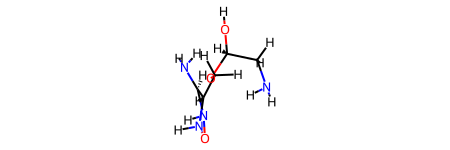

In [20]:
mol = load_pdbqt_and_add_hs(test_pdbqt_path)
mol[0]